In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import scipy.io as sio
from datasets import load_data
import matplotlib as mpl
from utils import project_cell_to_spot

### Loading Mapping Results, RNA, and Spatial Transcriptomics Data for Knowledge Transfer

In [2]:
data_name='smFISH'
RNA_data_adata, atlas = load_data(data_name)
map_matrix=sio.loadmat("coef/{}_C.mat".format(data_name))['C']

-Extending smFISH Analysis from 22 Genes to Millions

-Transferring Locations to scRNA for Cell Type Localization

In [3]:
spot2genes=np.dot(map_matrix,RNA_data_adata.X)
Pred_atlas = pd.DataFrame(data = spot2genes, columns = RNA_data_adata.var_names)
Pred_atlas_adata=sc.AnnData(Pred_atlas)
locations=atlas.obsm['spatial']
Pred_atlas_adata.obsm['spatial']=locations

d:\SoftWare\Anaconda\envs\python37\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


### Gene Reconstruction Visualization

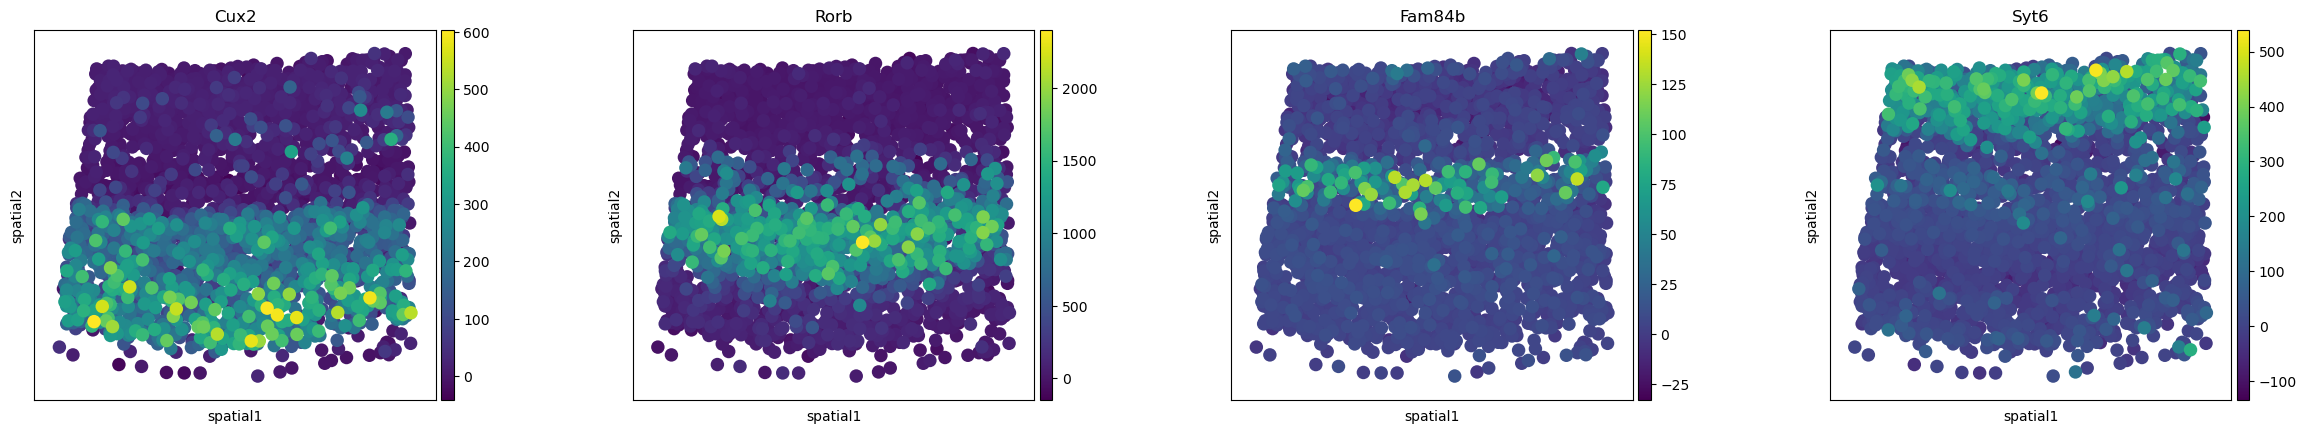

In [4]:
#inutput the ploted genes name 
pl_genes=['Cux2', 'Rorb','Fam84b','Syt6']

sc.pl.spatial(Pred_atlas_adata, img_key = None, color=pl_genes,spot_size=50)

### Calculate Cell Type Proportions
Get the cell types propotion of each spot

In [5]:
atlas.var_names_make_unique()  # Ensure unique gene names
atlas.var_names = [gene.lower() for gene in atlas.var_names]  # Convert gene names to lowercase

cell_type=RNA_data_adata.obs['cell_type'].unique()
atlas.obsm['map_matrix']=map_matrix
df_projection=project_cell_to_spot(atlas, RNA_data_adata, retain_percent=0.20)

In [6]:
df_projection

,Astro,CR,Endo,L2/3 IT,L4,L5 IT,L5 PT,L6 CT,L6 IT,L6b,...,NP,Oligo,Peri,Pvalb,SMC,Serpinf1,Sncg,Sst,VLMC,Vip
0,0.008725,0.001234,0.000000,0.002965,0.106373,0.075964,0.001909,0.504868,0.000424,0.046038,...,0.098297,0.004056,0.0,0.024492,0.000606,0.000000,0.000000,0.044316,0.022545,0.050733
1,0.029303,0.000000,0.000000,0.000450,0.601668,0.158437,0.001618,0.047860,0.000000,0.029656,...,0.029365,0.000469,0.0,0.019060,0.000000,0.000000,0.000000,0.040066,0.011595,0.024156
2,0.001651,0.000000,0.000000,0.376997,0.386195,0.017782,0.000368,0.001456,0.008363,0.006955,...,0.002925,0.001152,0.0,0.064070,0.001090,0.000822,0.000000,0.043035,0.012385,0.050197
3,0.002260,0.000000,0.000000,0.335591,0.372483,0.024956,0.000817,0.001746,0.005018,0.010648,...,0.002698,0.001509,0.0,0.071053,0.001172,0.000765,0.000000,0.054042,0.016147,0.070172
4,0.000000,0.000000,0.000000,0.000412,0.024832,0.000841,0.001402,0.000401,0.000000,0.008553,...,0.000000,0.000000,0.0,0.651516,0.000000,0.001707,0.000000,0.114950,0.013011,0.114815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,0.001941,0.000000,0.000000,0.366380,0.355304,0.028546,0.001300,0.008775,0.005265,0.015508,...,0.002269,0.000665,0.0,0.060244,0.001225,0.000901,0.000363,0.053226,0.001233,0.054821
2356,0.004817,0.000622,0.000000,0.001683,0.068777,0.060983,0.001883,0.525571,0.003029,0.077596,...,0.072542,0.002626,0.0,0.020572,0.000000,0.000000,0.000000,0.044202,0.017237,0.071255
2357,0.000829,0.000000,0.000746,0.000000,0.000422,0.000000,0.002804,0.010238,0.004201,0.022061,...,0.019643,0.000700,0.0,0.184875,0.000000,0.001844,0.000587,0.468970,0.016537,0.142510
2358,0.048233,0.000556,0.000823,0.003192,0.709529,0.172622,0.001541,0.001017,0.000470,0.010813,...,0.017106,0.001057,0.0,0.007212,0.000000,0.000000,0.000000,0.005415,0.007133,0.012342


### Localizing Cell Type

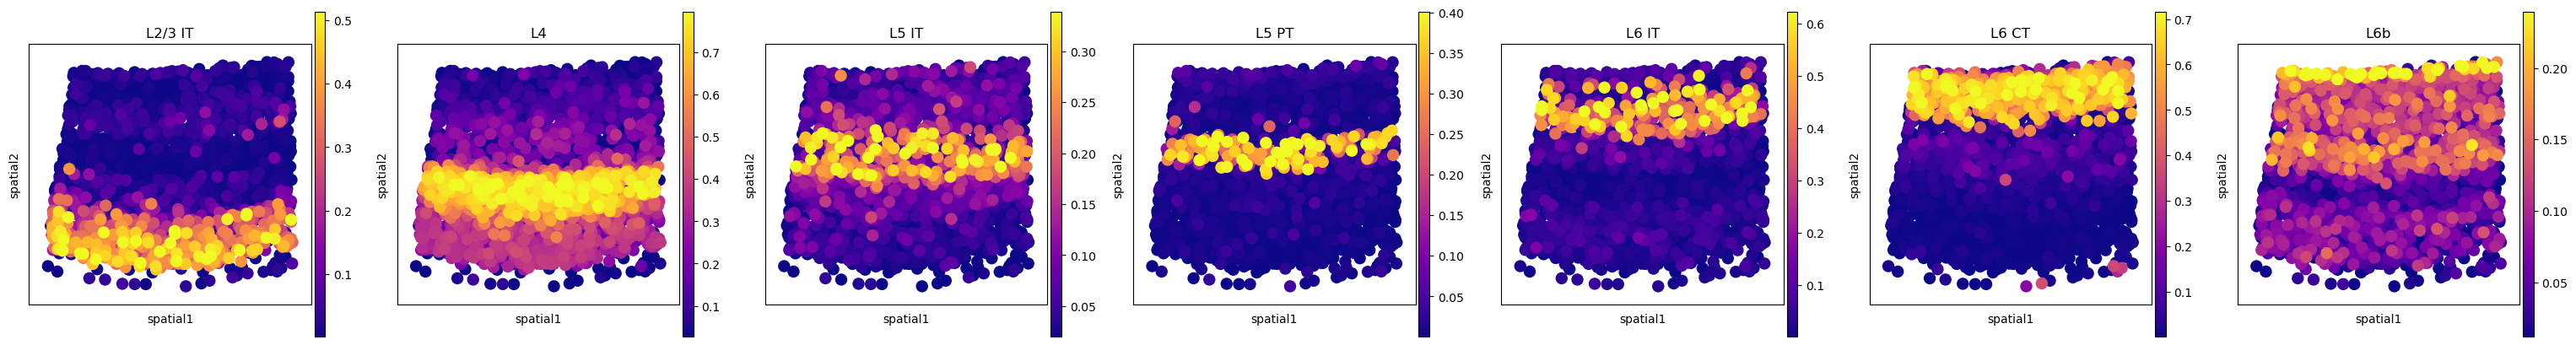

In [9]:
# ##Visualization of spatial distribution of scRNA-seq data
st_type=atlas.copy()
with mpl.rc_context({'axes.facecolor':  'white',
                        'figure.figsize': [4.5, 5]}):
            sc.pl.spatial(st_type, cmap='plasma',
                    # selected cell types
                    color=['L2/3 IT', 'L4', 'L5 IT', 'L5 PT', 'L6 IT', 'L6 CT', 'L6b'],
                    ncols=7, size=1.3,
                    img_key=None,
                    #img_key="hires",
                    spot_size=50,
            # limit color scale at 99.2% quantile of cell abundance
                    vmin='p25', vmax='p99.2',
                    legend_loc="none",
                    show=True
                    )

